<h2><font color="#07bdf5">Import the necessary libraries</font></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h2><font color="#07bdf5">1.Read and explore the given dataset. (Rename
column/add headers, plot histograms, find data
characteristics)</font></h2>

In [2]:
elec_df=pd.read_csv('ratings_Electronics.csv')

In [3]:
elec_df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


<font color='blue'>Observation: Found dataset with out column headers - Need to add header row</font>

In [4]:
#Adding Header
header=['user_id','product_id','rating','timestamp']

In [5]:
elec_df.columns=header

In [6]:
elec_df.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


<font color="07bdf5" style="font-family:courier;font-size:24px;">Observation:DataFrame loaded with header</font>

<font color='blue'>Finding data characterstics</font>

In [7]:
elec_df.shape

(7824481, 4)

In [8]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
elec_df.drop(labels='timestamp',axis=1, inplace=True)

In [10]:
# Check for missing value
elec_df.isna().sum()

user_id       0
product_id    0
rating        0
dtype: int64

In [11]:
elec_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


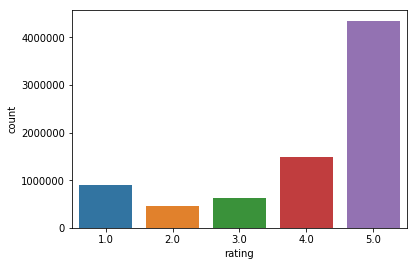

In [12]:
sns.countplot(data=elec_df, x='rating')

### Observation: There is no missing values

# <font color="#07bdf5">2.Take a subset of the dataset to make it less sparse/ denser.
( Keeping the users only who has given 50 or more number of ratings )</font>

#### Count the number of unique users in the dataset

In [13]:
users = elec_df['user_id'].unique()
print('Found ',len(users),' unique users out of ',elec_df.shape[0], 'rating observations')

Found  4201696  unique users out of  7824481 rating observations


#### Count the number of unique Electronic Items in the dataset

In [14]:
products = elec_df['product_id'].unique()
print('Found ',len(products),' unique Products out of ',elec_df.shape[0], 'rating for the products')

Found  476001  unique Products out of  7824481 rating for the products


In [15]:
elec_grouped = elec_df.groupby(['user_id']).agg({'rating':'count'}).reset_index()
r50_elec_df = elec_grouped.sort_values(['rating', 'user_id'], ascending = [0,1])

In [16]:
r50_elec_df.shape

(4201696, 2)

In [17]:
r50_elec_df.head()

,user_id,rating
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406


#### Considering user rated more than 50 electronic products

In [18]:
r50_elec_df = r50_elec_df[r50_elec_df['rating']>50]
r50_elec_df.rename(columns={'rating':'no_of_ratings'})

,user_id,no_of_ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


In [19]:
sparse_elec_df = elec_df[elec_df.user_id.isin(r50_elec_df['user_id'])]

In [20]:
sparse_elec_df.shape

(122171, 3)

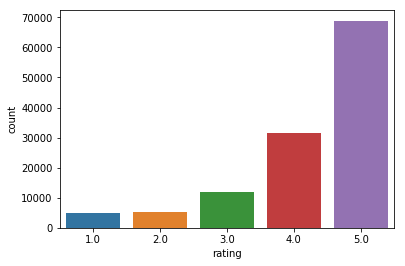

In [21]:
#plotting count of rating
sns.countplot(data=sparse_elec_df , x='rating')
plt.show()

In [22]:
sparse_elec_df.head()

,user_id,product_id,rating
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


In [23]:
#Unique products we are considering
products = sparse_elec_df['product_id'].unique()
print('After Sparse/Data subset, Found ',len(products),' unique Products out of ',sparse_elec_df.shape[0], 'rating for the products')

After Sparse/Data subset, Found  47155  unique Products out of  122171 rating for the products


# <font color="#07bdf5">3.Split the data randomly into train and test dataset. 
(Split it in 70/30 ratio)</font>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Splitting Train : Test data in 70:30 ratio
train_data, test_data = train_test_split(sparse_elec_df, test_size = 0.30, random_state=0)
print(train_data.head(5))

                user_id  product_id  rating
1374363  A1S7BFT0HDF3HA  B000TO1SMG     4.0
5343005  A1J75JJ0Q2OEJN  B0069QZ676     4.0
1903476   AGVWTYW0ULXHT  B001CHHVCU     3.0
1060011   ABXANRX4GPYRZ  B000IV413S     5.0
7187912  A1XE3M22N91451  B00BXA7N6A     5.0


In [26]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (85519, 3)
Shape of testing data:  (36652, 3)


# <font color="#07bdf5">4.Build Popularity Recommender model</font>

a. Count of user_id for each unique Electronic Product as recommendation score 

b. Sort the Electronic Products on recommendation score 

c. Get the top 5 recommendations

In [27]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product_id').agg({'user_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
train_data_grouped.head()

,product_id,score
0,0594481813,1
1,0970407998,2
2,0972683275,2
3,1400501466,3
4,1400501520,1


In [28]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'product_id'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,product_id,score,Rank
30197,B0088CJT4U,150,1.0
19162,B003ES5ZUU,130,2.0
8448,B000N99BBC,112,3.0
29619,B007WTAJTO,104,4.0
29901,B00829TIEK,104,5.0


### Use popularity based recommender model to make predictions and find recommendations for random list of users with inferences

In [29]:
# Use popularity based recommender model to make predictions
def popularity_recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [30]:
find_recom = ['AGVWTYW0ULXHT','ABXANRX4GPYRZ','A1E3OB6QMBKRYZ']   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: \n", str(i))
    print(popularity_recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 
 AGVWTYW0ULXHT
              userID  product_id  score  Rank
30197  AGVWTYW0ULXHT  B0088CJT4U    150   1.0
19162  AGVWTYW0ULXHT  B003ES5ZUU    130   2.0
8448   AGVWTYW0ULXHT  B000N99BBC    112   3.0
29619  AGVWTYW0ULXHT  B007WTAJTO    104   4.0
29901  AGVWTYW0ULXHT  B00829TIEK    104   5.0


Here is the recommendation for the userId: 
 ABXANRX4GPYRZ
              userID  product_id  score  Rank
30197  ABXANRX4GPYRZ  B0088CJT4U    150   1.0
19162  ABXANRX4GPYRZ  B003ES5ZUU    130   2.0
8448   ABXANRX4GPYRZ  B000N99BBC    112   3.0
29619  ABXANRX4GPYRZ  B007WTAJTO    104   4.0
29901  ABXANRX4GPYRZ  B00829TIEK    104   5.0


Here is the recommendation for the userId: 
 A1E3OB6QMBKRYZ
               userID  product_id  score  Rank
30197  A1E3OB6QMBKRYZ  B0088CJT4U    150   1.0
19162  A1E3OB6QMBKRYZ  B003ES5ZUU    130   2.0
8448   A1E3OB6QMBKRYZ  B000N99BBC    112   3.0
29619  A1E3OB6QMBKRYZ  B007WTAJTO    104   4.0
29901  A1E3OB6QMBKRYZ  B00829TI

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
test_users = test_data.iloc[[3,5,7]]['user_id']
for i in test_users:
    print("Here is the recommendation for the userId: \n", str(i))
    print(popularity_recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 
 A2J7FHZFKOKGZ6
               userID  product_id  score  Rank
30197  A2J7FHZFKOKGZ6  B0088CJT4U    150   1.0
19162  A2J7FHZFKOKGZ6  B003ES5ZUU    130   2.0
8448   A2J7FHZFKOKGZ6  B000N99BBC    112   3.0
29619  A2J7FHZFKOKGZ6  B007WTAJTO    104   4.0
29901  A2J7FHZFKOKGZ6  B00829TIEK    104   5.0


Here is the recommendation for the userId: 
 A7EU2BWLLCJY2
              userID  product_id  score  Rank
30197  A7EU2BWLLCJY2  B0088CJT4U    150   1.0
19162  A7EU2BWLLCJY2  B003ES5ZUU    130   2.0
8448   A7EU2BWLLCJY2  B000N99BBC    112   3.0
29619  A7EU2BWLLCJY2  B007WTAJTO    104   4.0
29901  A7EU2BWLLCJY2  B00829TIEK    104   5.0


Here is the recommendation for the userId: 
 A31N0XY2UTB25C
               userID  product_id  score  Rank
30197  A31N0XY2UTB25C  B0088CJT4U    150   1.0
19162  A31N0XY2UTB25C  B003ES5ZUU    130   2.0
8448   A31N0XY2UTB25C  B000N99BBC    112   3.0
29619  A31N0XY2UTB25C  B007WTAJTO    104   4.0
29901  A31N0XY2UTB25C  B

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user

# <font color="#07bdf5">5. Build Collaborative Filtering model.</font>
 Initially doing with svds in the package <font color="red">scipy.sparse.lilang package</font> <br> Later did the same using <font color="red">surprise package </font>

### Generate Sparse matrix table from explicit ratings table

In [32]:
sparse_elec_df.head()

,user_id,product_id,rating
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


In [33]:
#getting the pivot dataframe sparse_elec_df
pivot_df = sparse_elec_df.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
print(pivot_df.shape)
pivot_df.head()

(1466, 47155)


product_id,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
np.nonzero(pivot_df.iloc[0])
pivot_df.index[1] #To get corresponding user id for a given index / row number

/Users/thiru/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


'A100WO06OQR8BQ'

since NaNs cannot be handled by training algorithms, replacing NaN by 0, which indicates absence of ratings

## Generate the predicted ratings using SVD with number of singular values to be 50

# Singular Value Decomposition
## A = U . Sigma . V^T

##### Where 
A is the real m x n matrix that we wish to decompose, <br>
U is an m x m matrix, Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, <br>
V^T is the  transpose of an n x n matrix where T is a superscript.

In [35]:
pivot_matrix= pivot_df.as_matrix()
# mean_user_ratings = np.mean(pivot_matrix, axis = 1)
# pivot_matrix_demeaned = pivot_matrix - mean_user_ratings.reshape(-1, 1)

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
pivot_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
np.nonzero(pivot_matrix) #verifying non zero ites are there

(array([   0,    0,    0, ..., 1465, 1465, 1465]),
 array([  651,  1286,  1736, ..., 42407, 45173, 46850]))

In [38]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_matrix, k = 50) #Finding three required matrices with number of singular values 50

In [39]:
sigma = np.diag(sigma)


predicted_ratings = np.dot(np.dot(U, sigma), Vt) #+ mean_user_ratings.reshape(-1, 1) # using A = U.S.Vt(VTranspose)
predicted_df = pd.DataFrame(predicted_ratings, columns = pivot_df.columns)

In [40]:
predicted_df.head()

product_id,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [41]:
sparse_elec_df.head()

,user_id,product_id,rating
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


### Take a particular user_id - get top 5 recommendation

a. Lets find the recommendations for user with id A100WO06OQR8BQ

b. Get the predicted ratings for userID A100WO06OQR8BQ and sort them in descending order

c. Create a dataframe with name user_data containing userID A100WO06OQR8BQ explicitly interacted products

In [42]:
def recommend_products(predictions_df, pivot_df,  original_ratings_df,usr_index, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_id = pivot_df.index[usr_index]
    sorted_user_predictions = predictions_df.iloc[usr_index].sort_values(ascending=False)
    #print(sorted_user_predictions)
    # Get the user's data
    user_data = original_ratings_df[original_ratings_df.user_id == (user_id)]
    print(user_data.shape)
#     user_full = (user_data.merge(original_ratings_df, how = 'left', left_on = 'product_id', right_on = 'product_id').
#                      sort_values(['rating'], ascending=False)
#                  )

    print('User {0} has already rated {1} products.'.format(user_id, user_data.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = sorted_user_predictions.iloc[:num_recommendations]

    return user_data, recommendations

In [43]:
already_rated, predictions = recommend_products(predicted_df, pivot_df, sparse_elec_df, 1, 5)
print(predictions)

(132, 3)
User A100WO06OQR8BQ has already rated 132 products.
Recommending the highest 5 predicted ratings movies not already rated.
product_id
B003ES5ZUU    4.995806
B0088CJT4U    3.328561
B008DWCRQW    1.895834
B000N99BBC    1.817765
B002SZEOLG    1.398972
Name: 1, dtype: float64


In [44]:
# Take a 3 user ids and predict 5 users

In [45]:
user_list = [4,775,634]   # This list is user choice.
num_recommendations = 5
for i in user_list:
    print("Here is the recommendation for the userId: \n", str(i))
    already_rated, predictions = recommend_products(predicted_df, pivot_df, sparse_elec_df, i, num_recommendations)
    print(predictions)  
    print("\n") 


Here is the recommendation for the userId: 
 4
(65, 3)
User A10AFVU66A79Y1 has already rated 65 products.
Recommending the highest 5 predicted ratings movies not already rated.
product_id
B002R5AM7C    1.190042
B002V88HFE    0.938248
B0088CJT4U    0.758609
B003ES5ZUU    0.685782
B00AQRUW4Q    0.652779
Name: 4, dtype: float64


Here is the recommendation for the userId: 
 775
(51, 3)
User A303SNZ4AR7TDQ has already rated 51 products.
Recommending the highest 5 predicted ratings movies not already rated.
product_id
B005CT56F8    0.543776
B001TH7GUU    0.345270
B00BQ4F9ZA    0.297319
B009VV56TY    0.284569
B001QUA6R0    0.277337
Name: 775, dtype: float64


Here is the recommendation for the userId: 
 634
(66, 3)
User A2OOLI2WFY4L2 has already rated 66 products.
Recommending the highest 5 predicted ratings movies not already rated.
product_id
B003ES5ZUU    2.898107
B0041Q38NU    0.719499
B007WTAJTO    0.667447
B001TH7GUU    0.660711
B005FYNSPK    0.652349
Name: 634, dtype: float64




### Evaluation of Collabrative recommendation model for the SVD model created using Matrix Factorization 


In [46]:
pivot_df.head()

product_id,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
predicted_df.head()

product_id,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [48]:
# Average PREDICTED rating for each item
predicted_df.mean().head()

product_id
0594481813    0.002948
0970407998    0.003437
0972683275    0.009239
1400501466    0.004098
1400501520    0.001890
dtype: float64

In [49]:
rmse_df = pd.concat([pivot_df.mean(), predicted_df.mean()], axis=1).fillna(0)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(47155, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
product_id,,,
0594481813,0.002046,0.002948,0
0970407998,0.003411,0.003437,1
0972683275,0.010232,0.009239,2
1400501466,0.010232,0.004098,3
1400501520,0.003411,0.001890,4


In [50]:
error = (rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings)
RMSE = round(((error ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00285 



# Item - Item Collab Filtering  using <font color='red'>Surprise package</font>

### <font color='blue'>Using KNN</font>

In [51]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as ttsp

In [52]:
#pip install surprise

In [53]:
#trainset, testset = train_test_split(sparse_elec_df, test_size=.30)
# AttributeError: 'DataFrame' object has no attribute 'raw_ratings' - hence rename ratings column into raw_ratings
#sparse_elec_df.rename(columns={'rating':'raw_ratings'},inplace=True)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sparse_elec_df[['user_id', 'product_id', 'rating']], reader)


trainset, testset = ttsp(data, test_size=.20)

In [54]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_knn = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_knn.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [55]:
# run the trained model against the testset
test_pred = algo_knn.test(testset)
test_pred

[Prediction(uid='AEIB3UR05OP7A', iid='B00339X1EM', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1ZTR0FR5AW9B4', iid='B00E98G6GG', r_ui=4.0, est=4.262615617582058, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A33YZNZIRA3H97', iid='B003P2UMR6', r_ui=5.0, est=3.625, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A203OCQQ12MAVT', iid='B000NX3PII', r_ui=5.0, est=4.262615617582058, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1J5HIF41ENSMZ', iid='B00629NHW6', r_ui=4.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1MZL91Z44RN06', iid='B005Y8K82I', r_ui=5.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AIBRTGBN07D6A', iid='B0050A1O64', r_ui=4.0, est=4.052474003741576, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='ATOKT8QYK967L', iid='B00E9B

# <font color="#07bdf5">6. Evaluate the models.</font>

Since Popularity based model will suggest same list of top n (top 5) products, evaluation of the model may not be required. The following is the evaluatin the Collaborative Filtering SVD and KNN.

In [56]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.1306


1.1305711369278466

In [57]:
#from surprise.model_selection import cross_validate
# cross_validate(algo_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# #Due to system capacity Kernal died - but this is the way we can cross_validate

# algo_knn_10 = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': False})
# cross_validate(algo_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### <font color='blue'>Using SVD in surprise package</font>

In [58]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import KFold
from collections import defaultdict

In [61]:
algo_svd = SVD()
algo_svd.fit(trainset)
predictions = algo_svd.test(testset)


In [62]:
print("testset length {0}".format(len(testset)))
print("predictions length {0}".format(len(predictions)))

testset length 24435
predictions length 24435


### Cross valisation

In [63]:
# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9765
RMSE: 0.9862
RMSE: 0.9911


In [64]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9779  0.9814  0.9820  0.9796  0.9848  0.9811  0.0023  
MAE (testset)     0.7238  0.7252  0.7250  0.7239  0.7289  0.7254  0.0019  
Fit time          7.02    6.53    6.56    6.52    6.57    6.64    0.19    
Test time         0.20    0.17    0.31    0.18    0.18    0.21    0.05    


{'test_rmse': array([0.97794758, 0.981407  , 0.98195447, 0.97960268, 0.98481029]),
 'test_mae': array([0.7238283 , 0.72521934, 0.72496523, 0.72387078, 0.72890859]),
 'fit_time': (7.024402141571045,
  6.528949022293091,
  6.557581901550293,
  6.516669988632202,
  6.56763482093811),
 'test_time': (0.2018129825592041,
  0.17403888702392578,
  0.31084609031677246,
  0.17721796035766602,
  0.1827528476715088)}

## <font color="#07bdf5"> 7. Get top - K ( K = 5) recommendations.</font>

In [65]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    #We are using defaultdict object which is simmilar to normal python dictionary  but has concept of default empty values
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [66]:
top_n = get_top_n(predictions, n=5)
top_n #Printing top 5 items for each user in the test set

defaultdict(list,
            {'A2MJ8OL2FYN7CW': [('B000CKVOOY', 4.793714336237203),
              ('B006ZBWV0K', 4.783194164486978),
              ('B003ZSHKIY', 4.608786483643655),
              ('B005EJH6RW', 4.602086641353959),
              ('B006422WSG', 4.5005056169398046)],
             'A3NHUQ33CFH3VM': [('B004ELA0SS', 5),
              ('B0019EHU8G', 5),
              ('B00BOHNYU6', 4.880451524266332),
              ('B000VE2RP6', 4.787951965679397),
              ('B0034CL2ZI', 4.780867368823266)],
             'A204K1OFE8OB9Y': [('B0016D1I0G', 3.863823724100015),
              ('B0001Y7UAI', 3.666831921423216),
              ('B007XC99JQ', 3.622816501214885),
              ('B007FEFQDA', 3.6087239612647792),
              ('B002MAWDRO', 3.4410681014667905)],
             'A1NAA1R38JSNHV': [('B005NGKR54', 4.733311288999807),
              ('B004AZ38Z0', 4.670902301040497),
              ('B000TXEE14', 4.5711847031067645),
              ('B0053ORUS8', 4.5491202409388825),
   

In [67]:
top_n['A10AFVU66A79Y1']

[('B00603RTC8', 4.684541964836872),
 ('B000F34FVM', 4.527674197746153),
 ('B00IVPU59W', 4.490855714736612),
 ('B001DEYVXO', 4.450647517880116),
 ('B005EJLG28', 4.450341535677714)]


('B0074FGLUM', 4.827153154250237),
('B00IVPU786', 4.682612602555892),
('B00603RTC8', 4.635822272153297),
('B00IVPU59W', 4.598196392785156),
('B005EJLG28', 4.593062178132712)]

B002R5AM7C    1.202679
B002V88HFE    0.974396
B0088CJT4U    0.765560
B00AQRUW4Q    0.670731
B003ES5ZUU    0.657880


In [68]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import surprise; print("surprise", surprise.__version__)

Darwin-18.2.0-x86_64-i386-64bit
Python 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
surprise 1.1.0


# <font color="#07bdf5">8. Summary </font>

<font color="#07bdf5"></font>
<ul>
<li>First read data into dataframe found 7824481 observations. </li>
<li>Considering sparcity, and computational requirement for resource intensive algorigthmm</li>
<li>Considered the users that are rated more than 50 electronics item, Whch resulted in 122171 observations.</li> 
    <li>Built Popularity based recommender system, which is not user specific recommendation. Hence for each user it was suggesting same list of products (popular products) - <font color="red">not personalised</font></li>
    <pre>
    Here is the recommendation for the userId: A2J7FHZFKOKGZ6
               userID  product_id  score  Rank
30197  A2J7FHZFKOKGZ6  B0088CJT4U    150   1.0
19162  A2J7FHZFKOKGZ6  B003ES5ZUU    130   2.0
8448   A2J7FHZFKOKGZ6  B000N99BBC    112   3.0
29619  A2J7FHZFKOKGZ6  B007WTAJTO    104   4.0
29901  A2J7FHZFKOKGZ6  B00829TIEK    104   5.0


Here is the recommendation for the userId: A7EU2BWLLCJY2
              userID  product_id  score  Rank
30197  A7EU2BWLLCJY2  B0088CJT4U    150   1.0
19162  A7EU2BWLLCJY2  B003ES5ZUU    130   2.0
8448   A7EU2BWLLCJY2  B000N99BBC    112   3.0
29619  A7EU2BWLLCJY2  B007WTAJTO    104   4.0
29901  A7EU2BWLLCJY2  B00829TIEK    104   5.0


Here is the recommendation for the userId: A31N0XY2UTB25C
               userID  product_id  score  Rank
30197  A31N0XY2UTB25C  B0088CJT4U    150   1.0
19162  A31N0XY2UTB25C  B003ES5ZUU    130   2.0
8448   A31N0XY2UTB25C  B000N99BBC    112   3.0
29619  A31N0XY2UTB25C  B007WTAJTO    104   4.0
29901  A31N0XY2UTB25C  B00829TIEK    104   5.0

  </pre>
    <br><br>
    <font color="red">Model-based Collaborative Filtering</font>
    <li>Then created Singular Vector Decomposition using sscipy.sparse.linalg package and verified the recommendations. Using this method verified top 5 recommendation for three users.</li>
   <pre> 
    User A10AFVU66A79Y1 has rated 65 products.
	Recommending
	the highest 5 predicted ratings movies not already rated.
	product_id
	B002R5AM7C   
	B002V88HFE   
	B0088CJT4U   
	B003ES5ZUU   
	B00AQRUW4Q   <br>
	User A303SNZ4AR7TDQ has rated 51 products.
	Recommending
	the highest 5 predicted ratings movies not already rated.
	product_id
	B005CT56F8   
	B001TH7GUU   
	B00BQ4F9ZA   
	B009VV56TY   
	B001QUA6R0   <br>
	User A2OOLI2WFY4L2 has rated 66 products.
	Recommending
	the highest 5 predicted ratings movies not already rated.
	product_id
	B003ES5ZUU   
	B0041Q38NU   
	B007WTAJTO   
	B001TH7GUU 
	B005FYNSPK   <br>
    Getting different set of products for different user, hence buit personalized recommender system</pre>
    <li>Then created a recommender system using KNNwithMeans in surprise package.
    </li>
    <li>Next created a recommender system using SVD in <font color="red">surprise package</font>, and retrieved top 5 recommendations for randomly selected 3 users. Verified the performance using <font color="red">cross validation</font> 
        <pre>
       Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9779  0.9814  0.9820  0.9796  0.9848  0.9811  0.0023  
MAE (testset)     0.7238  0.7252  0.7250  0.7239  0.7289  0.7254  0.0019  
Fit time          7.02    6.53    6.56    6.52    6.57    6.64    0.19    
Test time         0.20    0.17    0.31    0.18    0.18    0.21    0.05  
        </pre>
        The Root Mean Squared Error(RMSE) and Mean Absolute Error (MAE) for test set almost same for different iterations (folds), with negligible Standard Deviation of 0.0023 for RSME and 0.0019 for MAE.</li>
        <li>Model-based Collaborative Filtering - is the presonalized recommender system that we have built. It is based on the past behaviour / interest exposed by the user.  </li>
</ul>